In [11]:
# Instakkubg required Libraries
!pip install kagglehub

In [12]:
# Data set Link -> https://www.kaggle.com/datasets/msambare/fer2013

In [13]:
# Downloading the data
import kagglehub

# Downloading
path= kagglehub.dataset_download("msambare/fer2013")
print('path to dataset folder:', path)

path to dataset folder: /kaggle/input/fer2013


In [14]:
# step 1 Install tensor flow
!pip install tensorflow

In [15]:
#Step 2 - Importing important libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from os import walk # only for counting

In [16]:
# Step 3 -  Set Dataset Paths
train_data ='/kaggle/input/fer2013/train'
test_data ='/kaggle/input/fer2013/test'


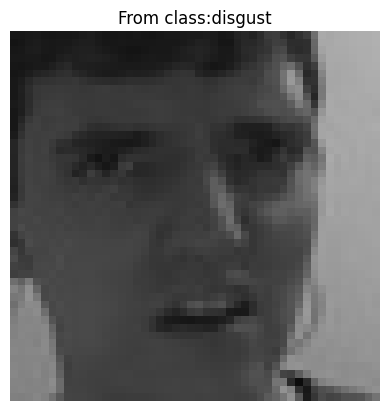

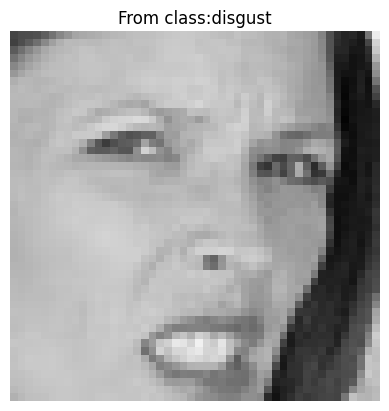

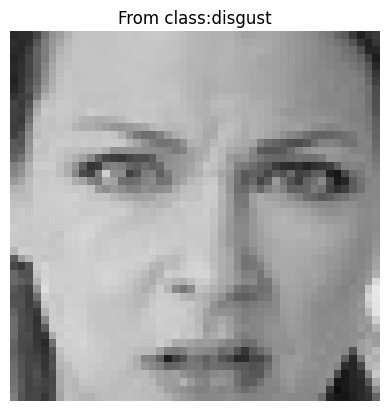

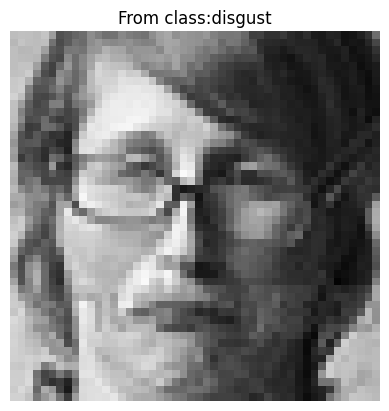

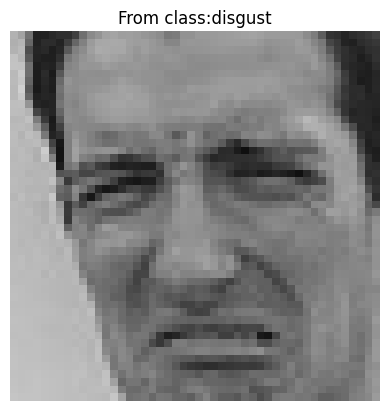

In [17]:
# PReview the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import numpy as np
import cv2

# Manually pick a class an image
sample_class = os.listdir(train_data)[5]
sample_image = os.listdir(os.path.join(train_data, sample_class))

# List image files inside the class folder
image_files = os.listdir(os.path.join(train_data, sample_class))

# Load and display first 2 images
for i in range(5):
    img_path = os.path.join(train_data, sample_class, image_files[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"From class:{sample_class}")
    plt.axis('off')
    plt.show()
    #print(f"Image shape: {img.shape}")



In [18]:
# Step 4 : Data Generators
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    test_data,
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle = True
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [19]:
# Model Evaluation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# Counting the images
def count_images(folder_path):
  return sum(len(files) for _, _, files in walk(folder_path))

num_train_imgs = count_images(train_data)
num_test_imgs = count_images(test_data)

print("Number of training images:", num_train_imgs)
print("Number of testing images:", num_test_imgs)


Number of training images: 28709
Number of testing images: 7178


In [24]:
# Training the model
epochs =15
history = model.fit(
    train_generator, steps_per_epoch = num_train_imgs // 32,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = num_test_imgs // 32
)

Epoch 1/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 378s 421ms/step - accuracy: 0.3847 - loss: 1.5557 - val_accuracy: 0.4752 - val_loss: 1.3688
Epoch 2/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.4062 - loss: 1.5967 - val_accuracy: 0.4753 - val_loss: 1.3663
Epoch 3/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 443s 448ms/step - accuracy: 0.4111 - loss: 1.5068 - val_accuracy: 0.4941 - val_loss: 1.3435
Epoch 4/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.3750 - loss: 1.5242 - val_accuracy: 0.4922 - val_loss: 1.3483
Epoch 5/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 432s 414ms/step - accuracy: 0.4356 - loss: 1.4488 - val_accuracy: 0.5140 - val_loss: 1.2696
Epoch 6/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.4688 - loss: 1.4315 - val_accuracy: 0.5142 - val_loss: 1.2725
Epoch 7/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 382s 426ms/step - accuracy: 0.4440 - loss: 1.4184 - val_accuracy: 0.5109 - val_loss: 1.2751
Epoch 8/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5000 - loss: 1

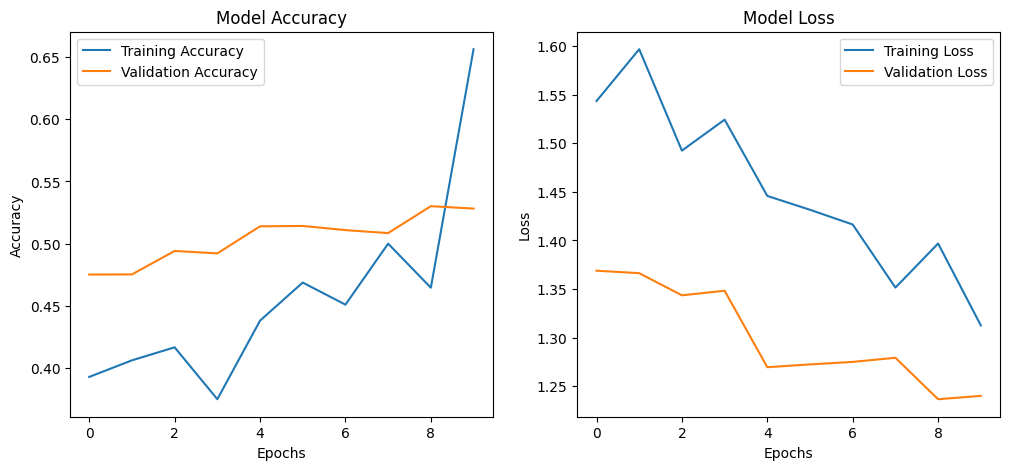

In [25]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize = (12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()